# Problem Statement

Customer Segmentation -> grouping of customers based on their spending patterns and purchase behaviour

# Work Flow

1. Data Collection -> Mall Customers dataset -> consisting of customers information
2. EDA ->  to understand the insights of the data, what is this data all about and other such kind of things
3. Feature Engineering -> what are the features the dataset containing & to select which features are important for us
4. Optimum number of Clusters -> Using - Within Cluster Sum of Squares(WCSS) -> tells us correct numbers of clusters suitable for this particular dataset
5. Model Selection -> K-Means Clustering -> Groups the data based on similarities
6. Visualizing the Clusters -> to get btter insights about the data

In [1]:
# importing the requied libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

# Data Collection

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

# EDA

**Missing Values**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# checking for missing values in the dataset

data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Statistical measures of the dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Numerical Variables**

In [7]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  4


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [8]:
# Numerical variables are usually of 2 type
# 1.Discrete Variables

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [9]:
# 2.Continuous Variables

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


In [10]:
continuous_feature

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


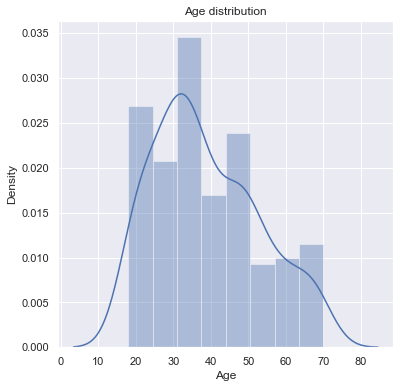

In [11]:
# distribution of Age

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.Age)
plt.title('Age distribution')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


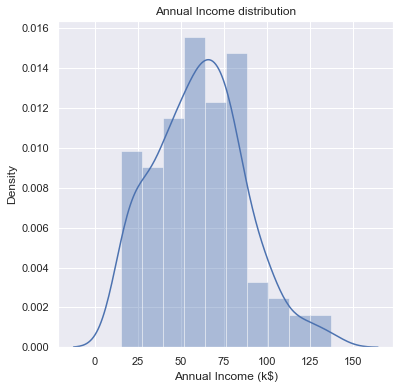

In [12]:
# distribution of Annual Income

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.iloc[:,3])
plt.title('Annual Income distribution')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


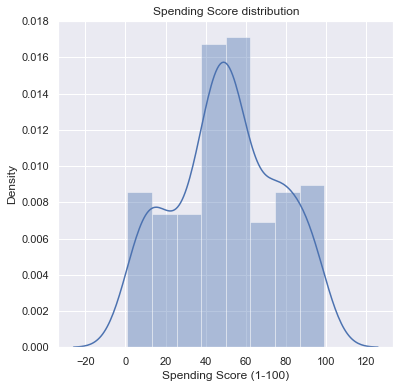

In [13]:
# distribution of Spending Score (1-100)

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.iloc[:,4])
plt.title('Spending Score distribution')
plt.show()

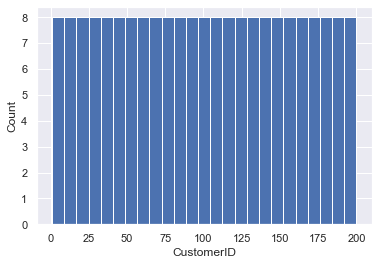

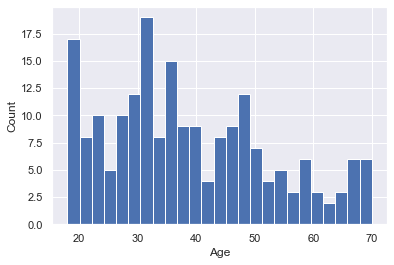

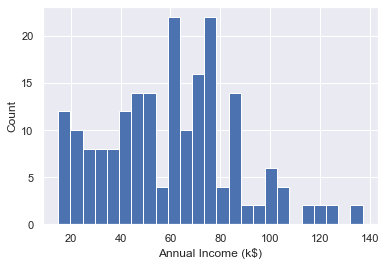

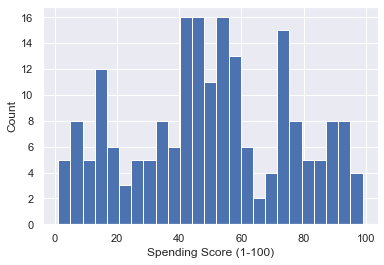

In [14]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    df=data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

**Outliers**

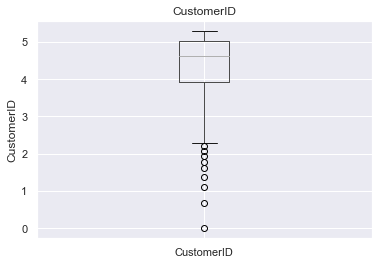

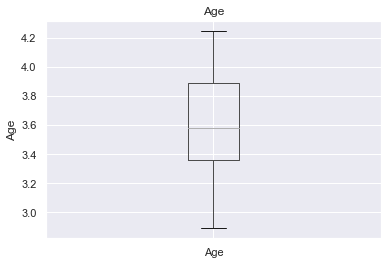

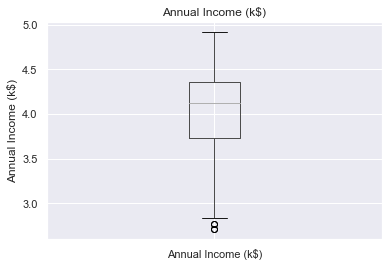

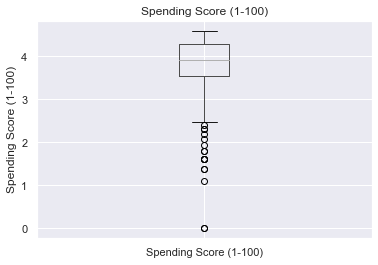

In [15]:
# only for continuous features
for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Categorical Variables**

In [16]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Gender']

In [17]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

Gender : 2


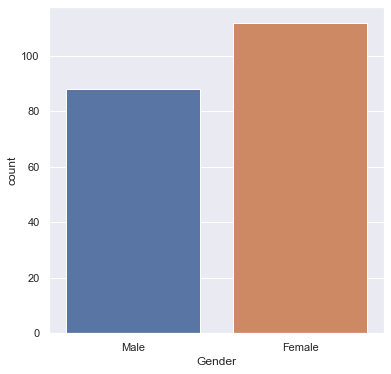

In [18]:
# distribution of Gender 

plt.figure(figsize=(6,6))
sb.countplot(x='Gender', data=data)
plt.show()

# Feature Engineering

**Encoding of Categorical Features**

In [19]:
# replacing the Gender values of Male and Female as 1 & 0 respectively

data.replace({'Gender':{'Female':0,'Male':1}}, inplace=True)

In [20]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Feature importance**

In [21]:
# Using Correlation

data.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


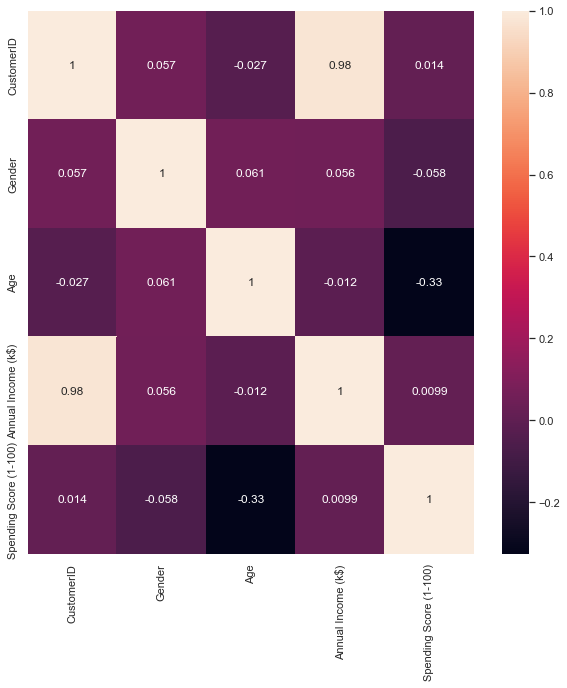

In [22]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr(), annot=True)
plt.show()

# Optimum number of Clusters

WCSS -> finds the distance between each data point and its centroid

In [23]:
# Finding WCSS value for different number of clusters

WCSS = []
for i in range(1,11):      # initially assuming 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    WCSS.append(kmeans.inertia_)

In [24]:
WCSS

[975512.06,
 387065.7137713772,
 271396.5629660314,
 195393.50384615397,
 157168.30001515945,
 122628.0624055683,
 103301.48639422176,
 86075.03422198715,
 77010.1590581194,
 68993.42912423519]

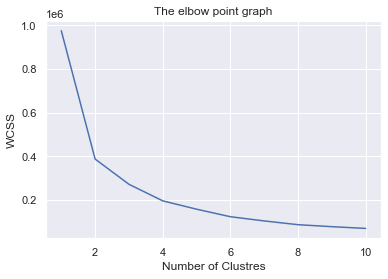

In [25]:
# plotting the elbow graph

sb.set()
plt.plot(range(1,11),WCSS)
plt.title('The elbow point graph')
plt.xlabel('Number of Clustres')
plt.ylabel('WCSS')
plt.show()

We take the value 4 (second elbow point) because after this there is no significant drop in the value. so we can choose optimum no. of clusters as 4

# Training the model - K-Means Clustering

In [26]:
# K Means Clustering

model = KMeans(n_clusters=4, init='k-means++', random_state=0)

In [27]:
# return a label for each data point based on their cluster (4 clusters)

Cluster_ID = model.fit_predict(data)
Cluster_ID

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

4 Clusters are -> 0, 1, 2, 3

In [28]:
# making clusterID as dataframe

ClusterID_df = pd.DataFrame(Cluster_ID, columns=['Cluster ID'])

In [29]:
# joining clusterID with data
result = data.join(ClusterID_df)
result

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster ID
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


In [30]:
# computing the Cluster centroids

clust_centroids = model.cluster_centers_
clust_centroids_df = pd.DataFrame(clust_centroids)
clust_centroids_df

,0,1,2,3,4
0,30.067797,0.372881,36.101695,29.864407,49.864407
1,162.000000,0.461538,32.692308,86.538462,82.128205
2,92.484848,0.439394,43.878788,57.727273,49.257576
3,164.000000,0.527778,40.805556,87.916667,17.888889
